Regresión Lineal - MSE: 0.33
Regresión Lineal - R²: 0.72


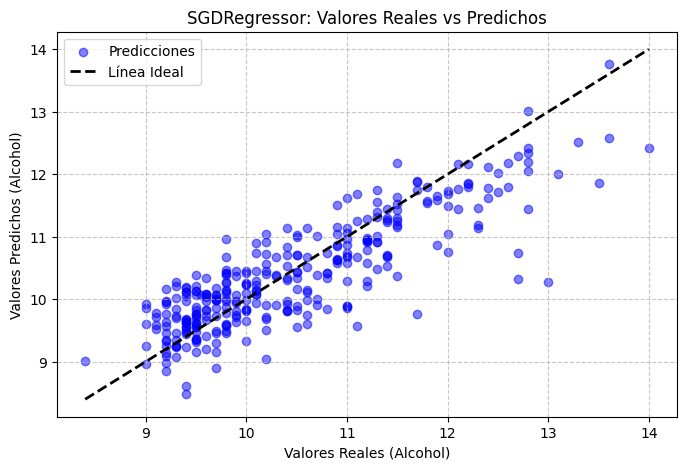

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error ,r2_score,accuracy_score, classification_report
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from  scipy.stats import uniform
import numpy as np
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

vino_df=pd.read_csv("winequality-red.csv")
vino_df.columns=['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Alcohol','Calidad']
vino_df
vino_df['Densidad'] = vino_df['Densidad'].apply(lambda x: f"{x:,.3f}")
vino_df['Cloruros'] = vino_df['Cloruros'].apply(lambda x: f"{x:,.3f}")
vino_df

#Valores utilizados para calcular las columnas deseadas
X = vino_df[['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Calidad']]
#Valores a calcular
y = vino_df['Alcohol']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

escalado=StandardScaler()
escalado.fit(X_train)
X_train=escalado.transform(X_train)
X_test=escalado.transform(X_test)


sgd_regressor = SGDRegressor(
    max_iter=1000, alpha=0.0001, learning_rate='invscaling', random_state=0)
sgd_regressor.fit(X_train, y_train)
y_pred = sgd_regressor.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Regresión Lineal - MSE: {mse:.2f}")
print(f"Regresión Lineal - R²: {r2:.2f}")

# Gráfico de resultados de la regresión
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Línea Ideal')
plt.xlabel('Valores Reales (Alcohol)')
plt.ylabel('Valores Predichos (Alcohol)')
plt.title('SGDRegressor: Valores Reales vs Predichos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()





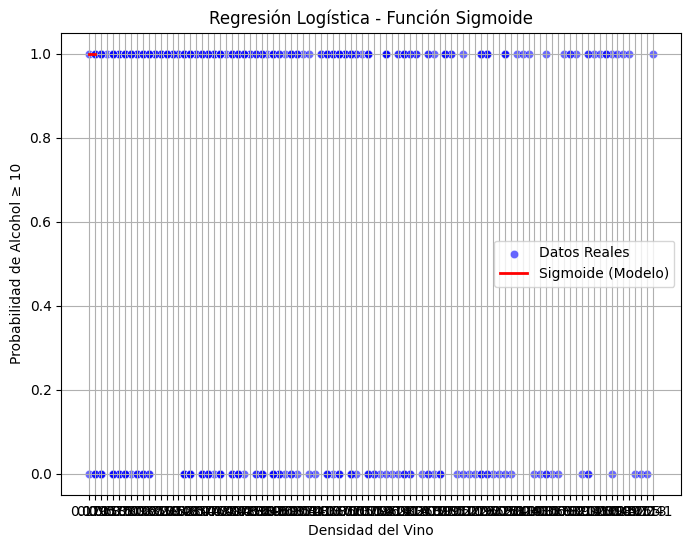

In [16]:
import pandas as pd
from sklearn.metrics import mean_squared_error ,r2_score,accuracy_score, classification_report
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from  scipy.stats import uniform
import numpy as np
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

vino_df['Alcohol_binario'] = vino_df['Alcohol'].apply(lambda x: 1 if x >= 10 else 0)
vino_df

# Valores utilizados para calcular las columnas deseadas
X = vino_df[['Cloruros']]
# Valores a calcular
y = vino_df['Alcohol_binario']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

clasificador= SGDClassifier(loss='log_loss', alpha=0.01,
                    max_iter=1000, random_state=0)
# Train the classifier
clasificador.fit(X_train, y_train)

# Make predictions
y_pred = clasificador.predict(X_test)

# Graficar los puntos reales y la curva sigmoide
plt.figure(figsize=(8,6))

# Puntos reales del dataset
sns.scatterplot(x=X_test['Cloruros'], y=y_test, color='blue', label="Datos Reales", alpha=0.6)

# Curva sigmoide predicha por el modelo
plt.plot(y_test, y_pred, color='red', linewidth=2, label="Sigmoide (Modelo)")

# Etiquetas y título
plt.xlabel("Densidad del Vino")
plt.ylabel("Probabilidad de Alcohol ≥ 10")
plt.title("Regresión Logística - Función Sigmoide")
plt.legend()
plt.grid(True)
plt.show()